In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

# Introduction to Statistics Inferential

## What is Statistics Inferential?

Inferential statistics is a branch of statistics that deals with making inferences or drawing conclusions about a population based on a sample of data. It involves using sample data to make generalizations or predictions about the larger population from which the sample was taken.

*Statistika inferensial adalah cabang ilmu statistika yang berhubungan dengan pembuatan kesimpulan atau penarikan kesimpulan tentang suatu populasi berdasarkan sampel data. Ini melibatkan penggunaan data sampel untuk membuat generalisasi atau prediksi tentang populasi yang lebih besar dari mana sampel diambil.*

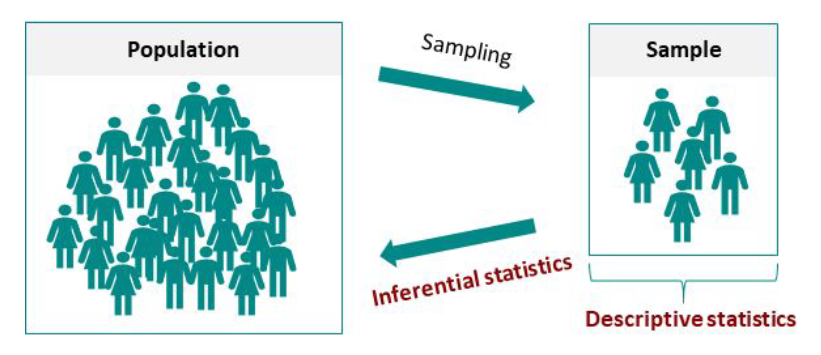

*Atau dalam kata lain, statistika deskriptif adalah penggambaran terhadap data itu sendiri (populasi) dan statistika inferensial adalah bentuk pendekatan penarikan kesimpulan gambaran data populasi dari data sampel yang ada*

## Background

1. **Konsep Populasi dan Sampel**:
- Populasi adalah keseluruhan grup subjek atau objek yang ingin kita pelajari.
- Karena sering kali tidak mungkin atau tidak praktis untuk mempelajari seluruh populasi, kita mengambil sampel, yang merupakan subset dari populasi.


2. **Estimasi Parameter**:
- Parameter adalah ukuran numerik yang menggambarkan karakteristik populasi, seperti rata-rata populasi (mean) atau standar deviasi.
- Statistika inferensial memungkinkan kita untuk mengestimasi parameter ini dengan menggunakan statistik dari sampel data.


3. **Teori Peluang**:
- Statistika inferensial didasarkan pada teori peluang, yang menyediakan dasar matematika untuk mengukur ketidakpastian dalam kesimpulan kita.
- Peluang digunakan untuk menentukan seberapa yakin kita terhadap kesimpulan yang kita buat dari sampel data.


4. **Pengujian Hipotesis**:
- Ini adalah proses di mana kita membuat asumsi tentang parameter populasi (hipotesis) dan menggunakan data sampel untuk menentukan apakah hipotesis tersebut harus ditolak atau tidak.
- Misalnya, kita mungkin ingin mengetahui apakah sebuah koin adalah adil atau tidak, atau apakah suatu obat memiliki efek yang signifikan.

5. **Interval Kepercayaan**:
- Rentang angka yang dihitung dari data sampel yang kemungkinan besar mengandung nilai parameter populasi.
- Interval ini memberi kita estimasi tentang di mana nilai sejati mungkin berada dan seberapa yakin kita dengan estimasi tersebut.

## Why Does It Matter & It's Development

**Pentingnya Statistika Inferensial**:

- Membuat kesimpulan: Menggunakan data yang terbatas untuk membuat kesimpulan yang umum dan seringkali sangat penting, misalnya dalam riset medis, ilmu sosial, dan pembuatan kebijakan.
- Pengambilan keputusan: Memberikan dasar untuk pengambilan keputusan yang berdasarkan data (data driven).
- Penelitian ilmiah: Merupakan dasar dari eksperimen dan penelitian ilmiah, memungkinkan ilmuwan untuk menguji teori dan hipotesis.

**Perkembangan Statistika Inferensial**:

- Mulai berkembang pada abad ke-20 sebagai respons terhadap kebutuhan untuk membuat kesimpulan yang lebih objektif dari data.
- Hasil dari kerja matematikawan seperti Ronald A. Fisher, Jerzy Neyman, Egon Pearson, dan lain-lain yang mengembangkan metode seperti ANOVA, pengujian hipotesis, dan teori estimasi.

Secara keseluruhan, statistika inferensial adalah alat penting dalam penelitian yang membantu kita memahami dunia melalui lensa data yang terbatas.

Example in 2024 Indonesian presidential election statistics

<iframe src="https://data.goodstats.id/statistic/embed/simulasi-3-nama-calon-presiden-2024-YIglM" frameborder="0" style="height: 356px; width: 50%"></iframe>

https://data.goodstats.id/statistic/adelandilaa/simulasi-3-nama-calon-presiden-2024-YIglM

# Sample vs Population

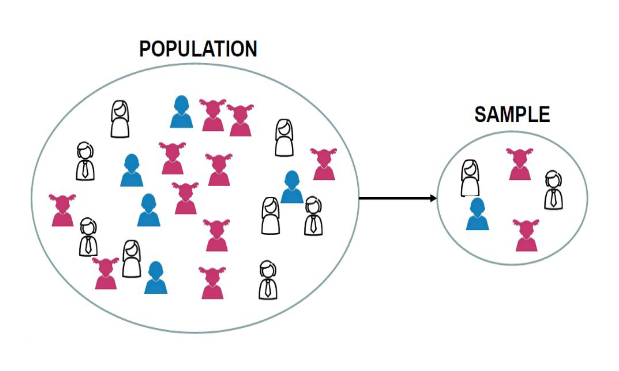

1. Data populasi mengacu pada informasi yang dikumpulkan dari setiap individu atau elemen dalam kelompok atau populasi tertentu.

2. Data sampel mengacu pada subkumpulan observasi atau pengukuran yang dipilih dari populasi yang lebih besar.

3. Memiliki data populasi merupakan tantangan besar.

4. Dalam kehidupan nyata, hanya data sampel yang tersedia hampir sepanjang waktu, namun hanya dalam jumlah kecil.

5. Sampel yang baik adalah yang dapat mewakili data populasi.

## Resampling

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. To understand what resampling is, let we look at the housing price in Amsterdam data distribution (histogram) below.

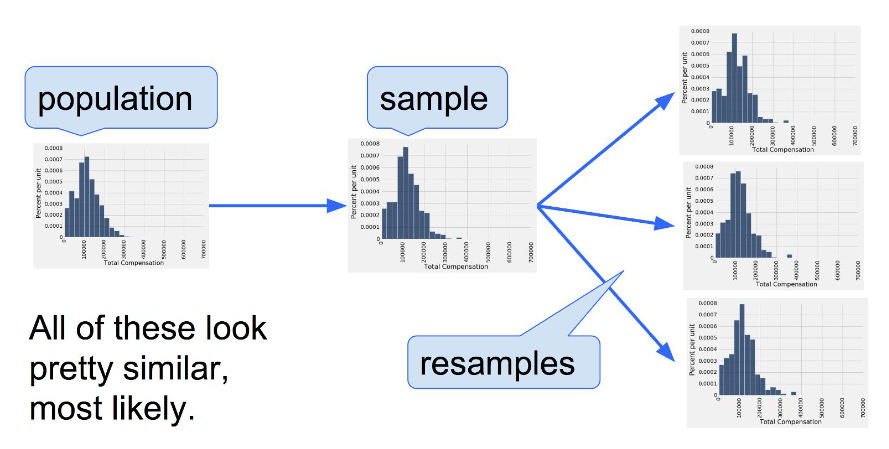

In [2]:
house_price = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv')
house_price

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


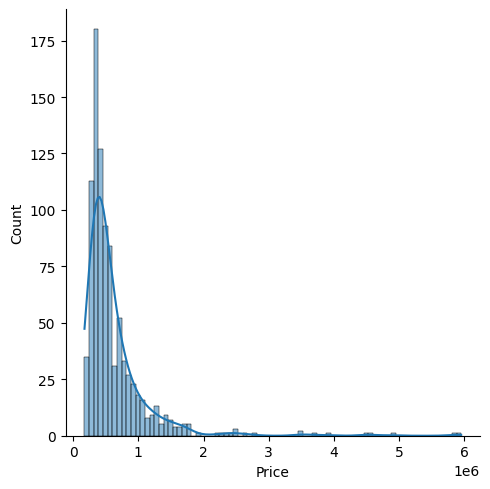

In [3]:
sns.displot(house_price.Price, kde=True, label='Housing Price in Amsterdam')

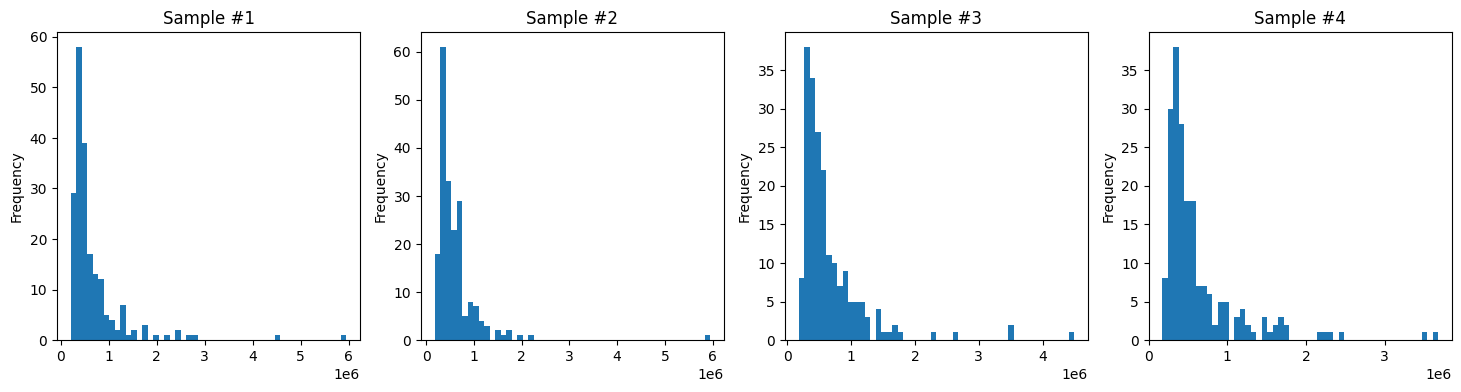

In [4]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
'''
fig adalah objek figure yang merupakan kontainer tingkat atas tempat semua elemen plot berada, 
dan ax adalah array objek axes yang merupakan area di mana data akan diplot.
plt.subplots digunakan untuk membuat gambar dan set subplot sekaligus. 
Parameter ncols=4 menunjukkan empat subplot berdampingan dalam satu baris. 
Parameter figsize=(18,4) menetapkan ukuran figur keseluruhan menjadi lebar 18 inci dan tinggi 4 inci.
'''
for i in range(4):                                                  # Loop 'for' yang berjalan 4 kali, dengan variabel i mengambil nilai dari 0 hingga 3
  house_price.Price.sample(200).plot(kind='hist',bins=50,ax=ax[i])
  '''
  house_price.Price merujuk pada kolom 'Price' dalam dataframe house_price.
  sample(200) mengambil 200 sampel acak dari kolom 'Price'.
  .plot(kind='hist', bins=20, ax=ax[i]) adalah perintah untuk membuat histogram dari sampel yang diambil. 
  kind='hist' menentukan bahwa plot harus berupa histogram, 
  bins=20 menetapkan bahwa histogram harus memiliki 20 batang (atau "bin"), 
  dan ax=ax[i] menentukan subplot mana yang harus digunakan untuk plot ini.
  '''
  ax[i].set_title('Sample #{}'.format(i+1))
  '''
  Ini mengatur judul untuk subplot saat ini dalam loop. 
  ax[i] menentukan subplot mana yang akan diberi judul, 
  dan set_title adalah metode yang digunakan untuk menetapkan judul tersebut.
  Sample #{}'.format(i+1) adalah string yang diberikan sebagai judul, 
  dan format(i+1) mengganti {} dalam string dengan nilai i+1, 
  sehingga judulnya akan menjadi 'Sample #1', 'Sample #2', dst., sesuai dengan nilai iterasi i dalam loop
  '''

We take 200 samples randomly from the housing price data and we did it 4 times. The visualization show that their distribution look the same. It happend simply because of randomness.

### Additional Example

In [5]:
from IPython.display import Video
Video('dogpicsliced.mp4')

https://imgur.com/w59YRy5

# Statistical Testing Tools and Metrics

## Statistical Significance

1. In  determining  whether  the  sample  data  can represent population  data, the  distribution should be the same as the population

*Sebarannya harus sama dengan populasi*

2. How to test the difference or the similarity between sample and population data, which is to measure the statistical significance

*Cara menguji perbedaan atau persamaan antara data sampel dan populasi, yaitu dengan mengukur signifikansi statistik*

Statistical significance is a term used when we are interested in detecting real differences, not due to chance between two or more groups (people, objects, ads, etc.)

*Signifikansi statistik adalah istilah yang digunakan ketika kita tertarik untuk mendeteksi perbedaan nyata, bukan karena kebetulan antara dua kelompok atau lebih (orang, objek, iklan, dll.)*

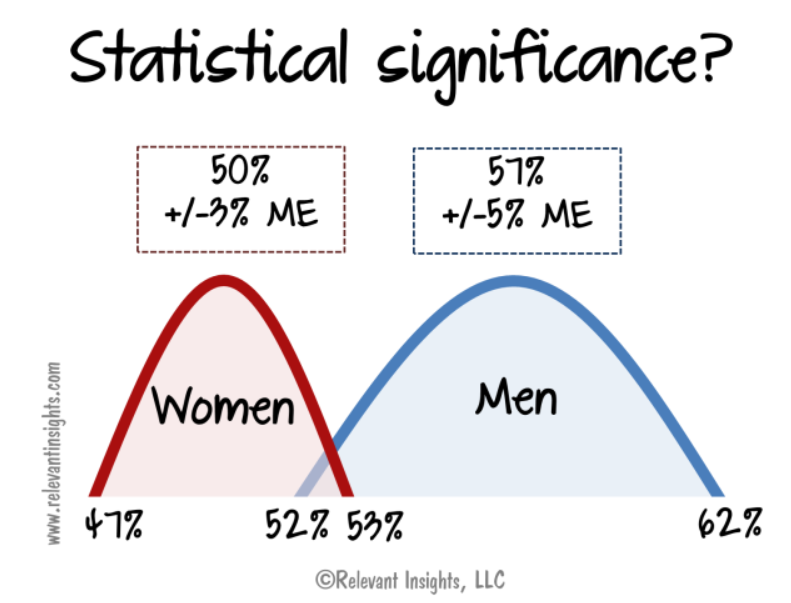

https://www.relevantinsights.com/articles/statistical-significance/

ME: Measurement Error

## P-Value

1. What is the benchmark that the two distributions are not significantly different?

*Apa tolok ukur agar kedua distribusi tersebut tidak berbeda nyata?*

2. P-value is the value of the possibility of a value being in a distribution

*P-value adalah nilai kemungkinan suatu nilai berada dalam suatu distribusi*

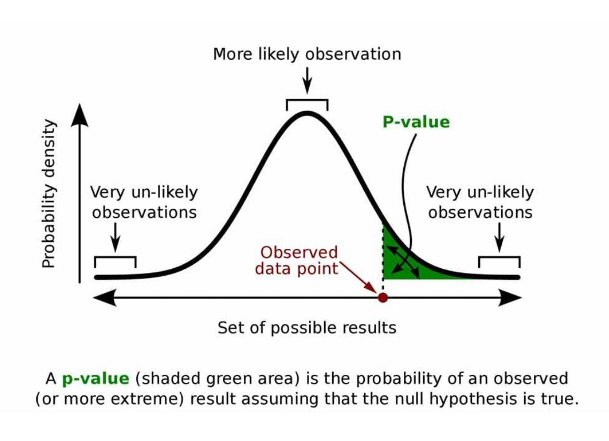

## Critical Value

1. The p-value that has been obtained will be tested whether it is likely to enter a distribution or not

*P-value yang telah diperoleh akan diuji apakah kemungkinan masuk suatu distribusi atau tidak*

2. This test will use critical value/limits

*Pengujian ini akan menggunakan batasan dari critical value*

3. P-value > critical value → possible inside the distribution

*P-value > critical value → kemungkinan di dalam distribusi*

4. P-value < critical value → possible outside

*P-value < critical value → kemungkinan di luar distribusi*

## Confidence Level

1. What is the critical value and how to determine it?

*Berapa nilai kritisnya dan bagaimana cara menentukannya?*

2. The basis of critical value departs from the level of trust

*Landasan citical value berangkat dari confidence level*

3. Usually, the confidence level is taken at 95% and the critical value is 5% (0.05)

*Biasanya diambil confidence level sebesar 95% dan critical value 5% (0,05)*

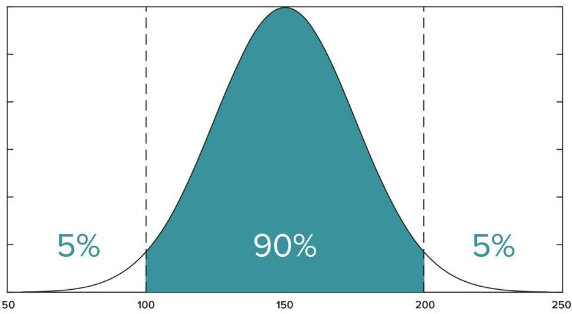

## Confidence Interval

1. The confidence interval can be analogous to the "range" for population data

*Interval kepercayaan dapat dianalogikan dengan “kisaran” untuk data populasi*

2. The lower limit and upper limit can be considered as the minimum and maximum values

*Batas bawah dan batas atas dapat dianggap sebagai nilai minimum dan maksimum*

3. Calculation of confidence intervals based on predetermined confidence levels

*Perhitungan confidence interval berdasarkan confidence level yang telah ditentukan*

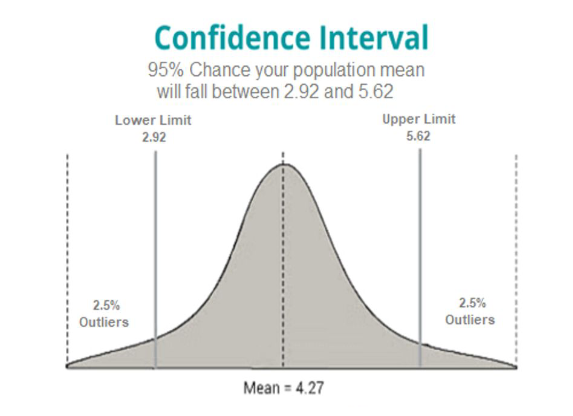

### **Case**: Determining New Warehouse Capacity

Your company is planning to build a new warehouse to improve the delivery service for the increasing number of shipments. Can you determine the appropriate capacity for the warehouse? (assuming that the warehouse capacity is determined by the number of goods that are shipped out each day and there are no goods that remain in the warehouse/inflow rate = outflow rate).

In [4]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom


We assume in our data that, each transaction has successfully shipped.

Extract date from `InvoiceDate`

In [5]:
data['Date'] = data['InvoiceDate'].dt.date
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01


In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,10000.0,9.719,-1131.0,1.0,3.0,12.0,1152.0,37.130479
InvoiceDate,10000,2011-07-02 11:22:17.981999872,2010-12-01 08:35:00,2011-03-25 10:33:30,2011-07-17 14:59:30,2011-10-17 16:53:00,2011-12-09 12:20:00,NaN
UnitPrice,10000.0,4.975422,0.0,1.25,2.08,4.13,5522.14,63.828081
CustomerID,7499.0,15275.863582,12347.0,13930.5,15144.0,16779.0,18287.0,1708.921268


In [7]:
data[data.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
32,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2010-12-01 14:33:00,1.65,12472.0,Germany,2010-12-01
100,C536855,21527,RED RETROSPOT TRADITIONAL TEAPOT,-4,2010-12-03 10:11:00,7.95,18225.0,United Kingdom,2010-12-03
141,537007,21172,NaN,-80,2010-12-03 15:36:00,0.00,NaN,United Kingdom,2010-12-03
227,C537251,22328,ROUND SNACK BOXES SET OF 4 FRUITS,-2,2010-12-06 10:45:00,2.95,NaN,United Kingdom,2010-12-06
249,C537402,47580,TEA TIME DES TEA COSY,-6,2010-12-06 14:43:00,2.55,15502.0,United Kingdom,2010-12-06
...,...,...,...,...,...,...,...,...,...
9784,C580740,20978,36 PENCILS TUBE SKULLS,-16,2011-12-06 09:25:00,1.25,12479.0,Germany,2011-12-06
9830,C580966,23108,SET OF 10 LED DOLLY LIGHTS,-2,2011-12-06 14:52:00,6.25,16554.0,United Kingdom,2011-12-06
9832,C580968,23581,JUMBO BAG PAISLEY PARK,-20,2011-12-06 14:57:00,2.08,15622.0,United Kingdom,2011-12-06
9844,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,2011-12-07


In [9]:
data[data.UnitPrice==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
141,537007,21172,NaN,-80,2010-12-03 15:36:00,0.0,NaN,United Kingdom,2010-12-03
272,537534,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom,2010-12-07
289,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom,2010-12-07
362,537876,84977,NaN,2,2010-12-08 18:08:00,0.0,NaN,United Kingdom,2010-12-08
373,537999,22034,NaN,-223,2010-12-09 11:44:00,0.0,NaN,United Kingdom,2010-12-09
383,538055,22454,NaN,-20,2010-12-09 13:34:00,0.0,NaN,United Kingdom,2010-12-09
802,539856,84968E,SET OF 16 VINTAGE BLACK CUTLERY,1,2010-12-22 14:41:00,0.0,NaN,United Kingdom,2010-12-22
875,540241,35957,NaN,-939,2011-01-05 15:17:00,0.0,NaN,United Kingdom,2011-01-05
889,540256,35957,NaN,35,2011-01-05 17:21:00,0.0,NaN,United Kingdom,2011-01-05
1469,542570,85028S,NaN,-1,2011-01-28 14:53:00,0.0,NaN,United Kingdom,2011-01-28


In [12]:
data[(data['Quantity'] < 0) | (data['UnitPrice'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
32,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2010-12-01 14:33:00,1.65,12472.0,Germany,2010-12-01
100,C536855,21527,RED RETROSPOT TRADITIONAL TEAPOT,-4,2010-12-03 10:11:00,7.95,18225.0,United Kingdom,2010-12-03
141,537007,21172,NaN,-80,2010-12-03 15:36:00,0.00,NaN,United Kingdom,2010-12-03
227,C537251,22328,ROUND SNACK BOXES SET OF 4 FRUITS,-2,2010-12-06 10:45:00,2.95,NaN,United Kingdom,2010-12-06
249,C537402,47580,TEA TIME DES TEA COSY,-6,2010-12-06 14:43:00,2.55,15502.0,United Kingdom,2010-12-06
...,...,...,...,...,...,...,...,...,...
9830,C580966,23108,SET OF 10 LED DOLLY LIGHTS,-2,2011-12-06 14:52:00,6.25,16554.0,United Kingdom,2011-12-06
9832,C580968,23581,JUMBO BAG PAISLEY PARK,-20,2011-12-06 14:57:00,2.08,15622.0,United Kingdom,2011-12-06
9844,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,2011-12-07
9850,C581100,22946,WOODEN ADVENT CALENDAR CREAM,-1,2011-12-07 11:44:00,16.95,14534.0,United Kingdom,2011-12-07


In [8]:
data.shape[0]

10000

There are minus values in the `Quantity` and zeros in `UnitPrice`, which is not good, so we remove them.

In [13]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01


In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,9785.0,10.378232,1.0,1.0,4.0,12.0,1152.0,33.312381
InvoiceDate,9785,2011-07-02 20:59:23.386816512,2010-12-01 08:35:00,2011-03-25 11:01:00,2011-07-18 12:05:00,2011-10-18 13:29:00,2011-12-09 12:20:00,NaN
UnitPrice,9785.0,4.07209,0.04,1.25,2.08,4.13,1683.75,26.274787
CustomerID,7352.0,15284.736398,12347.0,13952.75,15150.0,16788.5,18287.0,1708.010563


Grouping the data by date and aggregate with `sum` and only involve two columns which are `Date` and `Quantity`.

In [15]:
stock = data[['Date','Quantity']].groupby('Date').sum()
stock

,Quantity
Date,
2010-12-01,364
2010-12-02,487
2010-12-03,244
2010-12-05,212
2010-12-06,292
...,...
2011-12-05,695
2011-12-06,641
2011-12-07,519


In [16]:
print('Average =',stock['Quantity'].mean())
print('Minimum =',stock['Quantity'].min())
print('Maximum =',stock['Quantity'].max())

Average = 332.95409836065573
Minimum = 15
Maximum = 1463


In the past year, the number of goods coming out of the warehouse ranged from 15 to 1463 items per day, with an average of 333 items per day.

#### **Calculate Confidence Interval**

*Assume that population data is normally distributed*

`stats.norm.interval(conf_level,loc=average,scale="The_width_of th_ distribution_from_the_average")`

The width of the distribution from the average =  `std/sqrt(N)`

**If your data is not normally distributed, you can use this formula to calculate the confidence interval.**

```
Upper = Median + 1.7 * (1.25*IQR / 1.35*sqrt(N))

Lower = Median - 1.7 * (1.25*IQR / 1.35*sqrt(N))
```

Note: This is often used in notched box plots, a useful data visualization for non-normal data. If the notches of two medians do not overlap, the medians are, approximately, significantly different at about a 95% confidence level.

```
Reference:

[1] McGill, R., J. W. Tukey, and W. A. Larsen. "Variations of Boxplots." The American Statistician. Vol. 32, No. 1, 1978, pp. 12–16.
```

In [17]:
std = stock['Quantity'].std()     # Standard deviation of quantity
N = len(stock)                    # Length of the data
low, up = stats.norm.interval(    # Will have lower & upper limit
    0.95,                         # Confidence level in 95%
    loc=stock['Quantity'].mean(), # Average of quantity that store in warehouse
    scale=std/np.sqrt(N)          # The width of dist. from average
    )         
print('Lower Limit:',low)   # Lower limit
print('Upper Limit:',up)    # Upper limit

Lower Limit: 304.66768981244473
Upper Limit: 361.24050690886673


The estimated number of goods that can be shipped out each day ranges from 305 to 361 items.

Recommendation: Build/select a warehouse with a capacity of at least 361 items or 400 items.

# Statistical Distributions for Testing

"Statistical Distributions for Testing" merujuk pada distribusi statistik yang digunakan dalam pengujian hipotesis dan metode inferensial lainnya untuk menentukan bagaimana data diharapkan terdistribusi di bawah satu atau lebih asumsi yang ditetapkan. Ketika kita melakukan tes statistik, kita sering mengasumsikan bahwa data kita mengikuti distribusi probabilitas tertentu. Dua distribusi yang sering digunakan dalam pengujian statistik adalah:

1. **`Z-statistics`**:

- Z-statistic adalah nilai yang dihitung yang digunakan dalam z-test, sebuah jenis pengujian hipotesis. Ini mengukur seberapa jauh, dalam satuan standar deviasi, nilai rata-rata sampel dari rata-rata populasi yang dihipotesiskan.
- Z-test menggunakan distribusi normal standar, yang merupakan distribusi probabilitas yang telah distandarisasi sehingga memiliki rata-rata nol dan standar deviasi satu.
- Z-test biasanya digunakan ketika standar deviasi populasi diketahui dan ukuran sampel cukup besar (umumnya di atas 30), sehingga distribusi sampel rata-rata cenderung mendekati distribusi normal karena Teorema Batas Pusat.

2. **`T-statistics`**:

- T-statistic adalah nilai yang dihitung yang digunakan dalam t-test. T-test digunakan untuk menentukan apakah ada perbedaan yang signifikan antara rata-rata dua kelompok yang dapat dihubungkan secara independen atau berpasangan.
- T-test menggunakan distribusi t, yang serupa dengan distribusi normal tetapi memiliki ekor yang lebih lebar, yang memperhitungkan variasi tambahan dalam estimasi ketika standar deviasi populasi tidak diketahui dan ukuran sampel kecil.
- Distribusi t juga bergantung pada derajat kebebasan, yang terkait dengan ukuran sampel, dan bentuk distribusi berubah sesuai dengan perubahan jumlah derajat kebebasan.

Dalam keduanya, nilai statistik dihitung dari data dan kemudian dibandingkan dengan distribusi probabilitas yang relevan untuk menentukan p-value, yang digunakan untuk membuat keputusan tentang hipotesis yang diuji. Jika nilai statistik jauh dari nilai yang diharapkan di bawah hipotesis nol (yaitu, tidak ada efek atau perbedaan), p-value akan kecil, dan kita mungkin menolak hipotesis nol.

Selain dua diatas, terdapat juga beberapa contoh pengujian statistik lainnya:

1. **Normal Distribution**:
   - Sering digunakan dalam pengujian hipotesis ketika kita ingin menguji apakah rata-rata sampel berbeda dari rata-rata populasi yang diketahui atau ketika dua rata-rata sampel berbeda. Tes seperti t-test dan z-test mengasumsikan bahwa data terdistribusi normal.

2. **t-Distribution**:
   - Mirip dengan distribusi normal tetapi dengan ekor yang lebih lebar, digunakan terutama untuk sampel kecil di mana standar deviasi populasi tidak diketahui. Ini adalah dasar dari t-test yang digunakan untuk membandingkan rata-rata sampel dengan rata-rata populasi atau rata-rata antara dua sampel independen.

3. **Chi-Square Distribution**:
   - Digunakan dalam chi-square test untuk kategori data, seperti ketika kita ingin menguji apakah ada perbedaan signifikan antara frekuensi yang diharapkan dan yang diamati dalam tabel kontingensi.

4. **F-Distribution**:
   - Digunakan dalam analisis varians (ANOVA), yang memungkinkan kita untuk menguji perbedaan antara rata-rata dari tiga grup atau lebih.

5. **Exponential and Gamma Distributions**:
   - Digunakan untuk analisis waktu hidup atau data waktu tunggu, misalnya dalam analisis kelangsungan hidup atau keandalan.

6. **Binomial Distribution**:
   - Digunakan untuk data dengan dua hasil yang mungkin, seperti sukses/gagal, ya/tidak, dll. Binomial test digunakan untuk menguji proporsi yang diharapkan dari keberhasilan dalam serangkaian percobaan.

7. **Poisson Distribution**:
   - Digunakan untuk menguji frekuensi kejadian dari suatu peristiwa dalam interval waktu atau ruang yang tetap ketika peristiwa tersebut terjadi secara acak dan independen.


Setiap distribusi ini memiliki karakteristiknya sendiri dan digunakan berdasarkan jenis data dan asumsi yang terkait dengan pengujian hipotesis yang dilakukan. Memilih distribusi yang tepat penting karena ini memengaruhi bagaimana kita menghitung statistik tes dan bagaimana kita menginterpretasikan hasilnya.

## T-Statistics vs Z-Statistics

1. T and Z Statistics are tools for testing the significance of two data distributions

*T and Z Statistics adalah alat untuk menguji signifikansi dua distribusi data*

2. The data will naturally follow the normal distribution (z-distribution)

*Data secara alami akan mengikuti distribusi normal (distribusi z)*

3. However, the sample data that we have is not necessarily very large so the distribution tends to be abnormal

*Namun data sampel yang kita miliki belum tentu terlalu besar sehingga distribusinya cenderung tidak normal*

4. For data with a small number of samples, you can use t-statistics in inferential testing

*Untuk data dengan jumlah sampel yang sedikit, Anda dapat menggunakan t-statistics dalam pengujian inferensial*

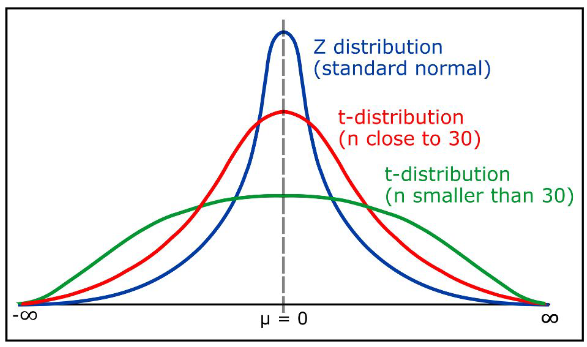

n: sample size

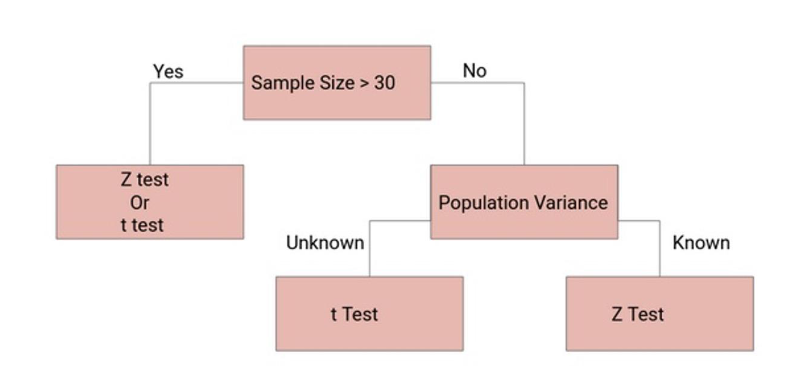

# Hypothesis Testing

1. Hypothesis testing is a statistical analysis framework for testing the significance of two data distributions

*Pengujian hipotesis merupakan kerangka analisis statistik untuk menguji signifikansi dua distribusi data*

2. In testing, the t and z statistics will also be used

*t and z statistics akan digunakan*

3. The hypothesis testing framework will test the validity of the null hypothesis (H0) on the alternative hypothesis (H1)

*Kerangka pengujian hipotesis akan menguji validitas hipotesis nol (H0) terhadap hipotesis alternatif (H1)*

4. Testing the truth will later involve p-value and critical value as proof of truth

*Pengujian kebenaran nantinya akan melibatkan p-value dan critical value sebagai pembuktian kebenaran*

5. If p-value > critical value then H0 is fail to rejected

*Jika p-value > critical value makan H0 gagal ditolak*

6. If p-value < critical value then H0 is sucessfully rejected and H1 is accepted

*p-value < critical value maka H0 berhasil ditolak dan H1 diterima*

## Hypothesis Testing Analogy

**`H0`**: The defendant is suspected of stealing an amount of IDR 1 billion

**`H1`**: The defendant did not steal money

Evidence that must be collected (**`critical value`**):

- Minimum 2 CCTV recordings

- Proof of money worth IDR 1 billion

- Proof of transaction

- Current accounts of the accused and the accuser

Collected proof (**`p-value`**):

- transaction proof only 

Conclusion: the defendant is not proven guilty (**`H0 is rejected & H1 as accepted`**)

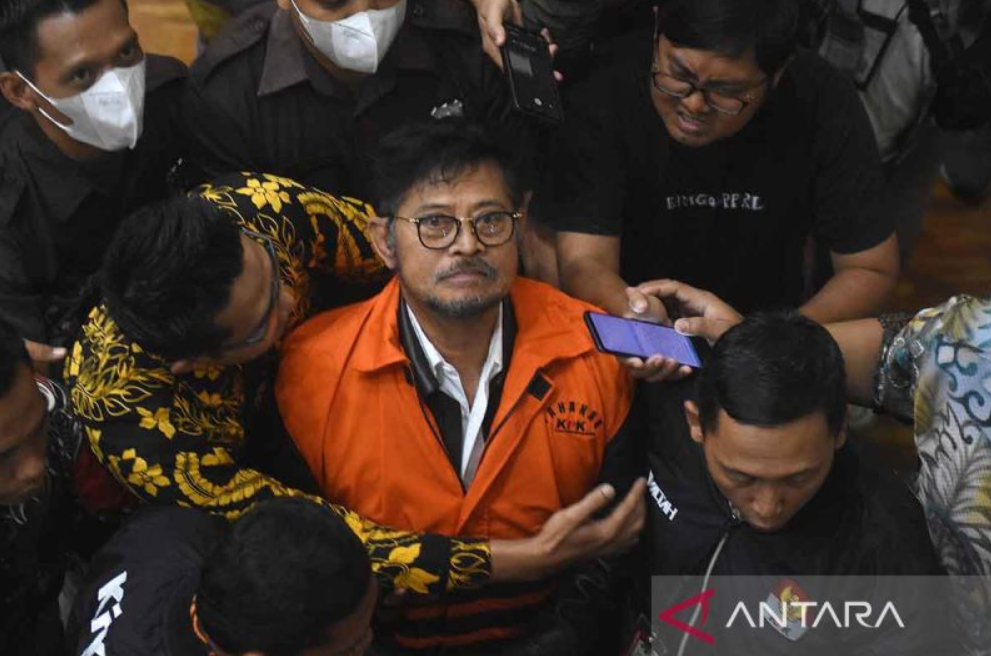

https://www.antaranews.com/foto/3772893/syahrul-yasin-limpo-ditahan-kpk

## Single Sample

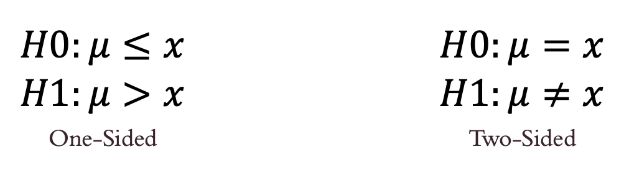

 **One-Sided** *For Example*

### **Case**: Student Council (OSIS) President Election in Hacktiv8 High School

Hacktiv8 High School is conducting an election for the Student Council President. There are three candidates competing in this event. The voting is attended by 250 students from grades 10 to 12 and 50 teachers and staff.

Later, during the vote-counting process, which is estimated to take 3 hours, the Class Representative Council (MPK) is conducting a quick count. The Class Representative Council conducted a survey among 20 students from various classes (grades 10 to 12).

Based on the age, the average age of the voters is 20.3 years. And from the survey results, the data of the ages of these 20 individuals are as follows:

In [18]:
survey = pd.DataFrame({'Age': [15,14,17,17,16,14,19,16,15,18,16,19,17,14,17,14,16,14,14,19]})
survey

,Age
0,15
1,14
2,17
3,17
4,16
5,14
6,19
7,16
8,15
9,18


Is the above data valid and can it be used as a reference for a quick count? (20 data represents 300 data).

We will perform the one sample - hypothesis test

In [19]:
survey.Age.mean()

16.05

In average, 20 voters are 16 years old, it is below the total voters average age. Moreover, if we compare the means, they are different. But, Is it significantly different in statistics?

#### Define the Hypothesis

**H0**: `Average of 20 voters ages = Average of 300 voters`

**H1**: `Average of 20 voters ages != Average of 300 voters`

**OR**

**H0**: `Average of 20 voters ages = 20.3`

**H1**: `Average of 20 voters ages != 20.3`

In [20]:
t_stat, p_val = stats.ttest_1samp(survey.Age, 20.3)
print('P-value:',p_val/2)       # The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 1.0024790759067526e-09
t-statistics: -10.611917704868308


Based on p-value that is less than critical value, 0.05, so the H0 is rejected. So, 16 and 20.3 are significantly different in statistics.

Futhermore, we conclude based on this analysis, 20-voters survey data is invalid and cannot be used for quick count.

About this result, we've already given a hint that the survey conducted only among 20 students from various classes (grades 10 to 12), it didn't invlove the teachers and staffs.

## Two-Sample

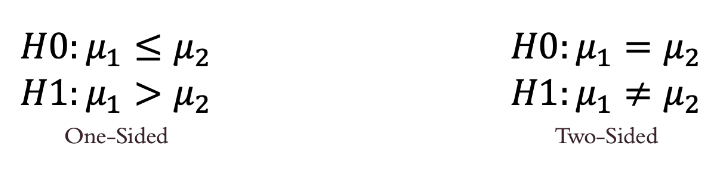

### Two-Sample Independent Test

#### **Case**: Which One Better? Sales in Germany or United Kingdom?

You are requested to analyze the sales performance in Germany and UK. The sales referred to are the monthly revenue from both countries. The purpose of this analysis is to determine the location for a new branch (either in Germany or UK).

In [21]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['Revenue'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month,year,Revenue
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,12,2010,17.85
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01,12,2010,12.60
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01,12,2010,51.00
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01,12,2010,2.55
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01,12,2010,16.50


In [22]:
# Monthly Revenue
UK = data[data['Country']=='United Kingdom'][['year','month','Revenue']].groupby(['year','month']).sum()
DE = data[data['Country']=='Germany'][['year','month','Revenue']].groupby(['year','month']).sum()

In [23]:
UK

Revenue
year month          
2010 12     13367.49
2011 1      10109.07
     2       7018.60
     3      10230.26
     4       8442.48
     5      11904.22
     6      11666.44
     7       9546.05
     8      12053.97
     9      16268.74
     10     18028.77
     11     24926.92
     12      7782.09

In [24]:
DE

Revenue
year month         
2010 12      309.10
2011 1       326.51
     2        42.90
     3       546.20
     4       368.68
     5       460.72
     6       134.50
     7       164.19
     8       148.80
     9       231.59
     10      596.20
     11      437.70
     12       82.58

In [25]:
print('Average Monthly Revenue of UK \t\t=', UK['Revenue'].mean())
print('Average Monthly Revenue of Germany \t=' ,DE['Revenue'].mean())

Average Monthly Revenue of UK 		= 12411.16153846154
Average Monthly Revenue of Germany 	= 296.1284615384615


Penjualan UK jauh lebih besar dari Jerman. Artinya performa penjualan UK lebih baik di satu tahun ke belakang. Karena ingin menguji perbedaan signifikan "data populasi" antara penjualan di UK dan Jerman dari data sampel setahun kebelakang

**H0**: Rata-rata pendapatan bulanan UK == Germany

**H1**: Rata-rata pendapatan bulanan UK != Germany

In [26]:
t_stat, p_val = stats.ttest_ind(UK['Revenue'], DE['Revenue'])
print('T-Statistic:',t_stat)
print('P-value:',p_val/2)

T-Statistic: 8.88800098677858
P-value: 2.3313412556798145e-09


### Paired Test (Two-Sample Dependent Test)

#### **Case**: Implementation on A/B Testing on Game Version

We're dealing with the marketing division of game developer company to analyze which game version that tend to give more retention rate? Is it correct that we upgrade our game from gate 30 to gate 40 version? (Data from https://www.kaggle.com/yufengsui/mobile-games-ab-testing) We will use retention_1 data which capture the information that did the player come back and play 1 day after installing.

In [27]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [28]:
# Dataframe dibagi dua berdasarkan 'version' game dan mengubah nilai True jadi 1 dan False jadi 0
gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})

print('Retention rate of gate 30 version:',gate_30.sum()/gate_30.count())
print('Retention rate of gate 40 version:',gate_40.sum()/gate_40.count())

Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


/var/folders/n5/yxbkb105257g9py6q62wp55c0000gn/T/ipykernel_5648/1380726733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
/var/folders/n5/yxbkb105257g9py6q62wp55c0000gn/T/ipykernel_5648/1380726733.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})


In [29]:
gate_30

0        0
1        1
6        0
11       0
13       1
        ..
90179    1
90180    0
90182    1
90183    0
90186    1
Name: retention_1, Length: 44700, dtype: int64

In [30]:
gate_40

2        1
3        0
4        1
5        1
7        0
        ..
90181    1
90184    1
90185    0
90187    1
90188    0
Name: retention_1, Length: 45489, dtype: int64

The retention rate between those versions is slightly different. Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_gate30 == μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [31]:
t_stat, p_val = stats.ttest_rel(gate_30.sample(44700), gate_40.sample(44700)) #we take 44700 sample of each data to make the size the same.
print('P-value:', p_val/2)

P-value: 0.03473945188284235


**Since the p-value is less than 0.05, we conclude that we succed to reject the Null Hypothesis** which means between gate 30 and 40 version isn't the same. We safely upgrade our game into gate 40 version or stay in 30 version.

## ANOVA

ANOVA (Analysis of Variance) is a statistical hypothesis test used to compare the means of `three or more groups`. It allows us to determine if there are statistically significant differences among the means of these groups. The ANOVA test is based on the analysis of the variance between groups and the variance within groups.

When conducting an ANOVA test, there are a few assumptions that need to be met, including:

1. Independence: The observations within each group are independent of each other.
2. Normality: The data within each group follows a normal distribution.
3. Homogeneity of variances: The variances within each group are approximately equal.

H0: there are no significant differences among the means of the groups

H1: at least one group mean is significantly different from the others

*ANOVA (Analysis of Variance) adalah uji hipotesis statistik yang digunakan untuk membandingkan rata-rata `tiga kelompok atau lebih`. Hal ini memungkinkan kita untuk menentukan apakah terdapat perbedaan yang signifikan secara statistik di antara rata-rata kelompok-kelompok ini. Uji ANOVA didasarkan pada analisis varian antar kelompok dan varian dalam kelompok.*

*Dalam melakukan uji ANOVA, ada beberapa asumsi yang harus dipenuhi, antara lain:*

1. *Independensi: Pengamatan dalam setiap kelompok tidak tergantung satu sama lain.*
2. *Normalitas: Data dalam setiap kelompok mengikuti distribusi normal.*
3. *Homogenitas varians: Varians dalam tiap kelompok kira-kira sama.*

*H0: tidak ada perbedaan signifikan antar kelompok*

*H1: paling sedikit rata-rata satu kelompok berbeda secara signifikan dengan kelompok lainnya*

### **Case**: Are There Significantly Difference of Heart Rate Among BMI Category?

In [32]:
sleep = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/sleep_dat.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [33]:
sleep['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [35]:
# Dataframe baru berdasarkan BMI Category
normal = sleep['Heart Rate'][(sleep['BMI Category']=='Normal') | (sleep['BMI Category']=='Normal Weight')]
overweight = sleep['Heart Rate'][sleep['BMI Category']=='Overweight']
obese = sleep['Heart Rate'][sleep['BMI Category']=='Obese']

In [36]:
print(f'Average Heart Rate of Normal Weight Group: \t {normal.mean():.2f}')
print(f'Average Heart Rate of Overweight Group: \t {overweight.mean():.2f}')
print(f'Average Heart Rate of Obese Group: \t\t {obese.mean():.2f}')

Average Heart Rate of Normal Weight Group: 	 68.98
Average Heart Rate of Overweight Group: 	 70.95
Average Heart Rate of Obese Group: 		 84.30


H0: There are not significantly difference of heart rate among three categories

H1: There are significantly difference of heart rate among three categories

In [38]:
res = stats.f_oneway(normal, overweight, obese)
print('P-value:',res.pvalue)

P-value: 1.318547773238438e-38


p-value less than 0.05, so that our H0 rejected, which means heart rate among normal weight, overweight, and obese are significantly different.

## Chi-Squared Test

The two-sample test hypothesis test is used to test the relationship between the two categorical variables. 
To measure chi-squared statistics, construct a  table that shows the observed frequencies of each combination of categories for the two variables.

H0: There is no relationship among variables

H1: There is the relationship among variables

*Uji hipotesis uji dua sampel digunakan untuk menguji hubungan antara `dua variabel kategori`.*

*Untuk mengukur statistik chi-squared, buatlah tabel yang menunjukkan frekuensi pengamatan setiap kombinasi kategori untuk kedua variabel.*

*H0 : Tidak ada hubungan antar variabel*

*H1 : Ada hubungan antar variabel*

### **Case**: 'Correlation' between Gender and Smoking Behaviour from Insurance Data

Conducting a Chi-Squared Hypothesis Test

H0: There is no relationship between Gender and Smoking Habit (Men and Women are the same).

H1: There is a relationship between Gender and Smoking Habit (Men and Women are different).


In [39]:
ins = pd.read_csv('https://github.com/fahmimnalfrzki/Dataset/raw/main/insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
# Contingency Table
contingency_table = pd.crosstab(ins['sex'], ins['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [41]:
result = stats.chi2_contingency(contingency_table)
print("P-value:", result.pvalue)

P-value: 0.0065481435035807025


Critical value: 0.05

p-val = 0.0065 < critical value

H0 rejected

**Conclusion**:

There is a relationship between gender and smoking habits, where smoking is more prevalent among males compared to females.